# Algorithm

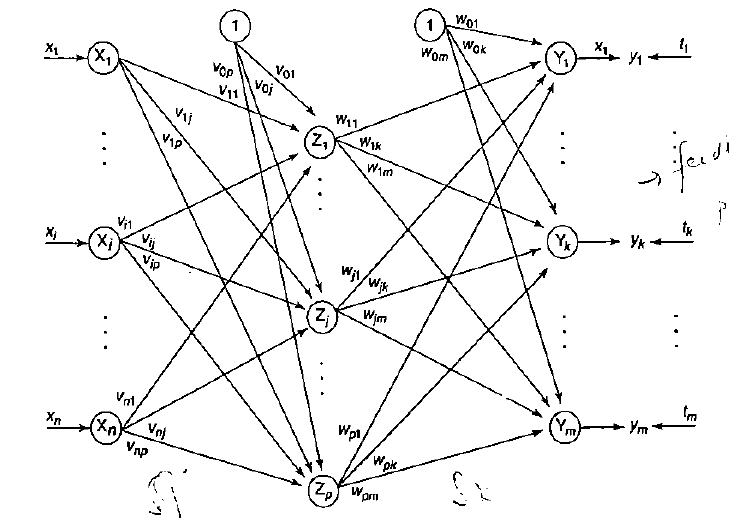

0. Initialize weights and learning rate (take some small random values).
1. Perform Steps 2-9 when stopping condition is false.
2. Perform Steps 3-8 for each training pair.

_Feed Forward Phase_

3. Each input unit receives input signals to calculate net input x<sub>i</sub> and sends it to hidden input(i=1 to n)
4. Each hidden unit $z_{j}$(j=1 to p) sums its weighted input signals to calculate net input:

$$z_{inj} =  v_{0j} + \sum \limits _{i=1}^{n}x_{i}v_{ij}$$

5. Calculate output of the hidden unit by applying its activation functions over z<sub>inj</sub> (bipolar sigmoidal activation function):

$$Z_{j} = f(z_{inj})$$

6. For each output unit y<sub>k</sub>(k=1 to m), calculate the net input:

$$y_{ink} =  w_{0k} + \sum \limits _{j=1}^{p}z_{i}w_{jk}$$

7. Apply the activation function to compute output signal 

$$Y_{k} = f(y_{ink})$$



_Back Propagation(Phase 2)_
8. Each output unit y<sub>k</sub> (k=1 to m) receives a target pattern corresponding to the input training pattern and computes the error correction term: 
#### $$\delta_{k} = (t_k - y_k) f'(y_{ink})$$

9. On basis of caculated error correction term, update the change in weights and bias:
#### $$\Delta w_{jk} = \alpha\delta_{k}z_{j} $$
#### $$\Delta w_{0k} = \alpha\delta_{k}$$

10. Send $\delta_{k}$ to the hidden layer backwards.

11. Each hidden unit $z_{j}$(j=1 to p) sums its delta inputs from the output units:
#### $$\delta_{inj}=\sum \limits_{k=1}^m \delta_k w_{jk}$$

12. We calculate the error term as follows
#### $$\delta_{j} = \delta_{inj}f'(z_{inj})$$

13. On basis of calculated $\delta_j$ update the change in weights and bias:

####  $$\Delta v_{ij} = \alpha \delta_{j} x_{i} $$
####  $$\Delta v_{0j} = \alpha \delta_{j}$$


_Weight and Bias updation(Phase 3)_

14. Each output unit $y_{k}$(k=1 to m) updates the bias and weights:

#### $$w_{jk}(new) = w_{jk}(old)+\Delta w_{jk} $$
#### $$w_{0k}(new) = w_{0k}(old)+\Delta w_{0k} $$

15. Each hidden unit $z_{j}$(j=1 to p) updates its bias and weights:

#### $$v_{ij}(new) = v_{ij}(old)+\Delta v_{ij} $$
#### $$v_{0j}(new) = v_{0j}(old)+\Delta v_{0j} $$

16. Check for the stopping condition. It may be certain numbers of epochs reached or when the actual output equals the target output


$\alpha$ is the learning rate

## Activation Function used

**Binary Sigmoid Function**
### $$ f(sum) = 1 / (1+e^{-s*sum}) $$ 
where s is the slope
### $$ f' = s*f(1-f) $$

## Errors

__Mean Absolute Error__

### $$ MAE = \frac{\sum \limits_{i=1}^{N} |\hat y_{i}-y_{i}|}{N}$$


__Sum Squared Error__

### $$ SSE = \sum \limits_{i=1}^{N} |\hat y_{i}-y_{i}|^{2} $$

__Mean Squared Error__

### $$ MSE = \frac{\sum \limits_{i=1}^{N} |\hat y_{i}-y_{i}|^{2}}{N}$$

## Library Imports

In [16]:
import pandas as pd
import random
import math

## Reading file and defining layers

In [17]:
# df = pd.read_csv('backpropagation.csv')

df = pd.read_csv('fourvars.csv') ## f(x) = x1*x3+x2*x4

number_of_attributes = list(df.shape)[1]

number_of_records = list(df.shape)[0]

neurons_per_layer = [number_of_attributes-1,4,3,2,1]

number_of_layers = len(neurons_per_layer) ##total layers in the NN

list_of_records = df.to_numpy().tolist()

split_ratio = 0.8 #train-test

print(df)

     x1    x2    x3    x4     t
0  0.12  0.45  0.23  0.21  0.12
1  0.43  0.21  0.45  0.19  0.23
2  0.26  0.29  0.34  0.54  0.25
3  0.19  0.22  0.29  0.62  0.19
4  0.63  0.47  0.27  0.39  0.35
5  0.81  0.56  0.17  0.68  0.52
6  0.69  0.42  0.38  0.65  0.54
7  0.12  0.56  0.41  0.59  0.38
8  0.64  0.51  0.62  0.77  0.79
9  0.60  0.88  0.32  0.30  0.46


## Utility Functions

In [18]:
def activation_function(x,s=1):
    return 1/(1+math.exp(-s*x))

def activation_func_derivate(f,s=1):
    return s*f*(1-f)

def mean_absolute_error(pair_list):
    sum_so_far = 0.0
    for pair in pair_list:
        sum_so_far += abs(pair[1] - pair[0])
    return sum_so_far

def sum_squared_error(pair_list):
    sum_so_far = 0.0
    for pair in pair_list:
        sum_so_far += (pair[1] - pair[0])**2
    return sum_so_far

def mean_square_error(pair_list):
    size = len(pair_list)
    sum_so_far = 0.0
    for pair in pair_list:
        sum_so_far += (pair[1] - pair[0])**2
    return sum_so_far/size

## Train Test Split

In [19]:
train_set = []
test_set = []

train_set_length = round(split_ratio*number_of_records,0)
test_set_length = number_of_records-train_set_length

for row in list_of_records:
    test_or_train = round(random.uniform(0,1),1)
    if len(train_set) == train_set_length:
        test_set.append(row)
    elif len(test_set) == test_set_length:
        train_set.append(row)
    else:    
        if test_or_train < split_ratio:
            train_set.append(row)
        else:
            test_set.append(row)

print(train_set)

print(test_set)

[[0.12, 0.45, 0.23, 0.21, 0.12], [0.43, 0.21, 0.45, 0.19, 0.23], [0.26, 0.29, 0.34, 0.54, 0.25], [0.81, 0.56, 0.17, 0.68, 0.52], [0.69, 0.42, 0.38, 0.65, 0.54], [0.12, 0.56, 0.41, 0.59, 0.38], [0.64, 0.51, 0.62, 0.77, 0.79], [0.6, 0.88, 0.32, 0.3, 0.46]]
[[0.19, 0.22, 0.29, 0.62, 0.19], [0.63, 0.47, 0.27, 0.39, 0.35]]


## Extracting Data for training

In [20]:
input_matrix = [row[:-1] for row in train_set]
target_list = [row[-1] for row in train_set]

print(input_matrix)
print(target_list)

[[0.12, 0.45, 0.23, 0.21], [0.43, 0.21, 0.45, 0.19], [0.26, 0.29, 0.34, 0.54], [0.81, 0.56, 0.17, 0.68], [0.69, 0.42, 0.38, 0.65], [0.12, 0.56, 0.41, 0.59], [0.64, 0.51, 0.62, 0.77], [0.6, 0.88, 0.32, 0.3]]
[0.12, 0.23, 0.25, 0.52, 0.54, 0.38, 0.79, 0.46]


## Initialising matrices of weight,bias,change in weight and change in bias

In [21]:
weight_matrix = []

bias_matrix = []

change_in_weight_matrix = []

change_in_bias_matrix = []
#first row contains input layer,last row contains one layer before output layer
for i in range(0,number_of_layers-1): 
    weight_row = []
    bias_row = []
    dummy_row = []
    dummy_bias = []
    #number of weights = neurons(i)*neurons(i+1)
    for j in range(0,neurons_per_layer[i+1]): 
        weight_set = []
        dummy_set = []
        #weights[0][0] = [weights(first input neuron) to first neuron of next layer]
        for k in range(0,neurons_per_layer[i]): 
            weight_set.append(random.uniform(0,1))
            dummy_set.append(0)
        weight_row.append(weight_set)
        dummy_row.append(dummy_set)
        bias_row.append(+1.0)
        dummy_bias.append(0)
    bias_matrix.append(bias_row)
    weight_matrix.append(weight_row)
    change_in_weight_matrix.append(dummy_row)
    change_in_bias_matrix.append(dummy_bias)
    
    
print(weight_matrix)
print(change_in_weight_matrix)
print(bias_matrix)
print(change_in_bias_matrix)

[[[0.21192360823348355, 0.8657261502339111, 0.6052235487606682, 0.6502388612010632], [0.6625119769961105, 0.5144677104136438, 0.8736192880197879, 0.4279252892983524], [0.36109432797676977, 0.5092814821186905, 0.3739593761050035, 0.2662715017110586], [0.5246850099661595, 0.25470223700295314, 0.24935053271933516, 0.6217919368990834]], [[0.8663921461075718, 0.5167497372957758, 0.7383677789075721, 0.35750854194994564], [0.9117419010617254, 0.8112776024345317, 0.9881820601126088, 0.05281699507372073], [0.16792162018513024, 0.29514358054020995, 0.7628655702599945, 0.21084351287787217]], [[0.9790524523474804, 0.5306652821602773, 0.48174258423300687], [0.06331031998884773, 0.3537155049917734, 0.9266241374003125]], [[0.43582792697426753, 0.7104685532019447]]]
[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0], [0, 0, 0]], [[0, 0]]]
[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0], [1.0]]
[[0, 0, 0, 0], [0, 0, 0], [0, 0], [0]]


## Training

In [22]:
learning_rate = 0.5
number_of_epochs = 0

maxSamples = train_set_length
max_iterations = 100000


while number_of_epochs < max_iterations:
    test = 0 ##sample number
    final_output = []
    while test < maxSamples:
        ## initialising the output,derivative,error correction matrices
        output_matrix = []
        derivative_matrix = []
        error_correction_matrix = []
        
        #first row contains second layer outputs,last row contains output layer outputs
        for i in range(0,number_of_layers-1): 
            dummy_row = []
            for j in range(0,neurons_per_layer[i+1]):
                dummy_row.append(0)
            output_matrix.append(dummy_row)

        for i in range(0,number_of_layers-1):
            dummy_row = []
            for j in range(0,neurons_per_layer[i+1]):
                dummy_row.append(0)
            derivative_matrix.append(dummy_row)

        for i in range(0,number_of_layers-1): 
            dummy_row = []
            for j in range(0,neurons_per_layer[i+1]):
                dummy_row.append(0)
            error_correction_matrix.append(dummy_row)

        ##filling the output and derivative matrices
        for i in range(0,len(weight_matrix)):
            for j in range(0,len(weight_matrix[i])):
                output = 0
                for k in range (0,len(weight_matrix[i][j])):
                    if i == 0:
                        output += weight_matrix[i][j][k]*input_matrix[test][k]
                    else:
                        output += weight_matrix[i][j][k]*output_matrix[i-1][k]
                output += bias_matrix[i][j]
                output_matrix[i][j] = activation_function(output)
                derivative_matrix[i][j] = activation_func_derivate(output_matrix[i][j])

        ##filling the error correction matrices
        i = len(error_correction_matrix)-1

        for j in range(0,len(error_correction_matrix[i])):
            error_correction_matrix[i][j] = (target_list[test]-output_matrix[i][j])*derivative_matrix[i][j]

        i -= 1

        while i>=0:
            for j in range(0,len(error_correction_matrix[i])):
                for k in range(0,len(error_correction_matrix[i+1])):
                    error_correction_matrix[i][j] += (error_correction_matrix[i+1][k]*weight_matrix[i+1][k][j])
                error_correction_matrix[i][j] *= derivative_matrix[i][j]
            i -= 1

        ##filling the change in weight and change in bias matrices
    
        for i in range(0,len(change_in_weight_matrix)):
            for j in range(0,len(change_in_weight_matrix[i])):
                change_in_bias_matrix[i][j] = learning_rate*error_correction_matrix[i][j]
                for k in range(0,len(change_in_weight_matrix[i][j])):
                    if i!=0:
                        change_in_weight_matrix[i][j][k] = learning_rate*error_correction_matrix[i][j]*output_matrix[i-1][k]
                    else:
                        change_in_weight_matrix[i][j][k] = learning_rate*error_correction_matrix[i][j]*input_matrix[test][k]
                

        ##changing weights
        for i in range(0,number_of_layers-1): 
            for j in range(0,neurons_per_layer[i+1]): 
                for k in range(0,neurons_per_layer[i]):
                    weight_matrix[i][j][k] += change_in_weight_matrix[i][j][k]
            bias_matrix[i][j] += change_in_bias_matrix[i][j]
        if number_of_epochs == max_iterations-1:
            final_output.append([round(output_matrix[-1][-1],2),target_list[test]])
        test += 1
    number_of_epochs += 1

In [23]:
print('Output -> Target')

for x in final_output:
    print(x)

Output -> Target
[0.12, 0.12]
[0.23, 0.23]
[0.25, 0.25]
[0.52, 0.52]
[0.54, 0.54]
[0.38, 0.38]
[0.79, 0.79]
[0.46, 0.46]


In [24]:
print(mean_square_error(pair_list=final_output))
print(sum_squared_error(pair_list=final_output))
print(mean_absolute_error(pair_list=final_output))

0.0
0.0
0.0


## Testing

## Extracting Data for testing

In [25]:
test_input = [row[:-1] for row in test_set]
test_target = [row[-1] for row in test_set]

print(test_set)
print(test_target)

[[0.19, 0.22, 0.29, 0.62, 0.19], [0.63, 0.47, 0.27, 0.39, 0.35]]
[0.19, 0.35]


In [26]:
print(test_input)

[[0.19, 0.22, 0.29, 0.62], [0.63, 0.47, 0.27, 0.39]]


In [27]:
def test(inputs,weights,bias):
    for i in range(0,len(weights)):
        for j in range(0,len(weights[i])):
            output = 0
            for k in range (0,len(weights[i][j])):
                if i == 0:
                    output += (weights[i][j][k]*inputs[k])
                else:
                    output += weights[i][j][k]*output_matrix[i-1][k]
            output += bias[i][j]
            output_matrix[i][j] = activation_function(output)
            
    return output_matrix[i][j]
    
index = 0
test_output = []

for row in test_input:
    test_output.append([test_target[index],round(test(inputs=row,weights=weight_matrix,bias=bias_matrix),2)])
    index += 1

for x in test_output:
    print(f'{x[0]}->{x[1]}')

0.19->0.22
0.35->0.31


In [28]:
print(mean_square_error(pair_list=test_output))

0.0012499999999999992


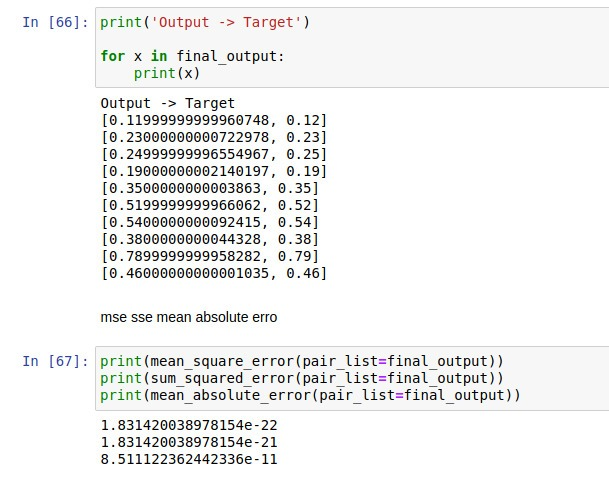